In [1]:
from toylib_projects.dotsAndBoxes import gametypes
from toylib_projects.dotsAndBoxes import mcts
from toylib_projects.dotsAndBoxes.interfaces import visualize

In [8]:
import numpy as np


def human_player(game: gametypes.GameState, last_action: int) -> int:
    """A human player based on terminal input."""
    del game, last_action # Unused in this function
    try:
        move = int(input("Enter your move (-1 to exit): "))
    except ValueError as e:
        print("Invalid input. Please enter a number.")
        raise e
    return move


def get_mcts_player(
    policy_fn: callable,
    max_simulattions: int = 100,
) -> callable:
    def inner(game: gametypes.GameState, last_action: int) -> int:
        """Returns a player function that uses MCTS to select the next move."""
        del last_action
        root = mcts.TwoPlayerGameTreeNode(game=game)
        action = mcts.mcts(
            root=root,
            max_simulattions=max_simulattions,
            policy_fn=policy_fn
        )
        visualize.plot_tree(root)
        return action

    return inner

class MCTSPlayer:
    def __init__(self, policy_fn: callable, max_simulations: int = 100, debug: bool = False, wait_for_input: bool = False):
        self.policy_fn = policy_fn
        self.max_simulations = max_simulations

        # Debug and visualization options
        self.root = None
        self.debug = debug
        self.wait_for_input = wait_for_input

    def __call__(self, state: gametypes.GameState, last_action: int) -> int:
        # If the root node is None, create a new root node
        self.root = mcts.TwoPlayerGameTreeNode(game=state)

        # Find the best action for this player using MCTS
        action = mcts.mcts(
            root=self.root,
            max_simulations=self.max_simulations,
            policy_fn=self.policy_fn
        )

        # Visualize the tree if debugging is enabled
        if self.debug:
            visualize.plot_tree(self.root, max_children_per_node=8, max_depth=4)
        if self.wait_for_input:
            _ = input("Press Enter to continue...")
        return action

def random_policy(state: gametypes.GameState) -> int:
    """A random policy that selects a valid action at random."""
    return np.random.choice(state.valid_actions)

In [9]:
from IPython.display import clear_output


def play_interactive(game, player_fns: list[callable] | None = None):
    """player_fns is a list of player functions, one for each player."""
    if not player_fns:
        player_fns = [human_player, human_player]
    assert len(player_fns) == 2, "There must be exactly two player functions."

    last_action = -1
    while not game.game_over():
        visualize.plot_dots_and_boxes(game)
        print("Available moves:", game.valid_actions)
        try:
            move = player_fns[game.next_player](game, last_action)
        except ValueError as e:
            clear_output(wait=True)
            print("Invalid input. Please enter a number.")
            continue
        if move in game.valid_actions:
            game = game.move(move)
            last_action = move
            clear_output(wait=True)
        elif move == -1:
            print("Exiting the game.")
            return game
        else:
            print("Invalid move. Try again.")

    visualize.plot_dots_and_boxes(game)
    print("Game over!")
    print("Winner: ", game.get_winner())

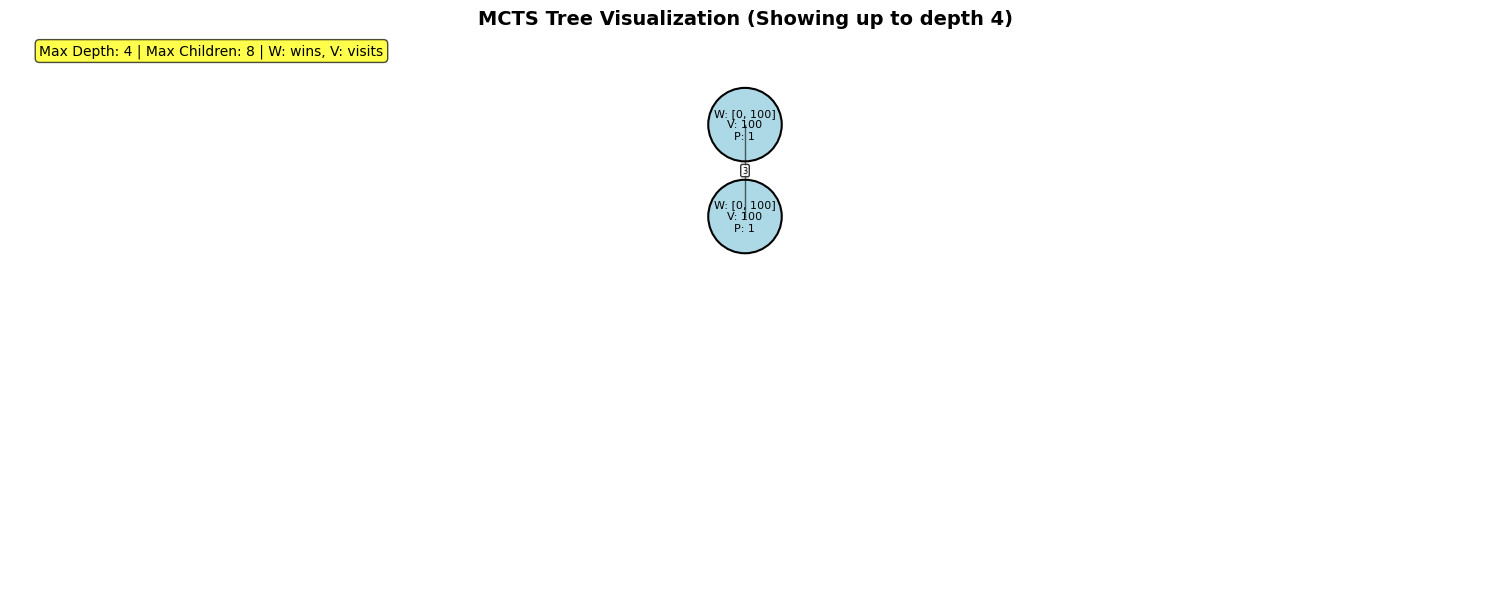

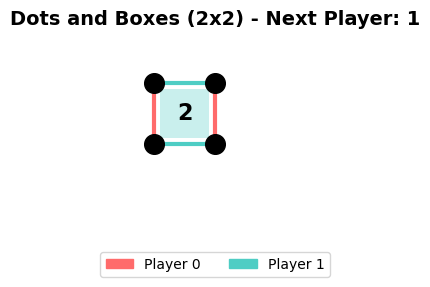

Game over!
Winner:  1


In [11]:
mcts_player = MCTSPlayer(
    policy_fn=random_policy,
    max_simulations=100,
    debug=True,
    wait_for_input=True,
)

player_fns_human_mcts = [
    mcts_player,
    mcts_player,
    # human_player,
]

game = gametypes.DotsAndBoxesGame(rows=2, cols=2)
updated_game = play_interactive(game=game, player_fns=player_fns_human_mcts)

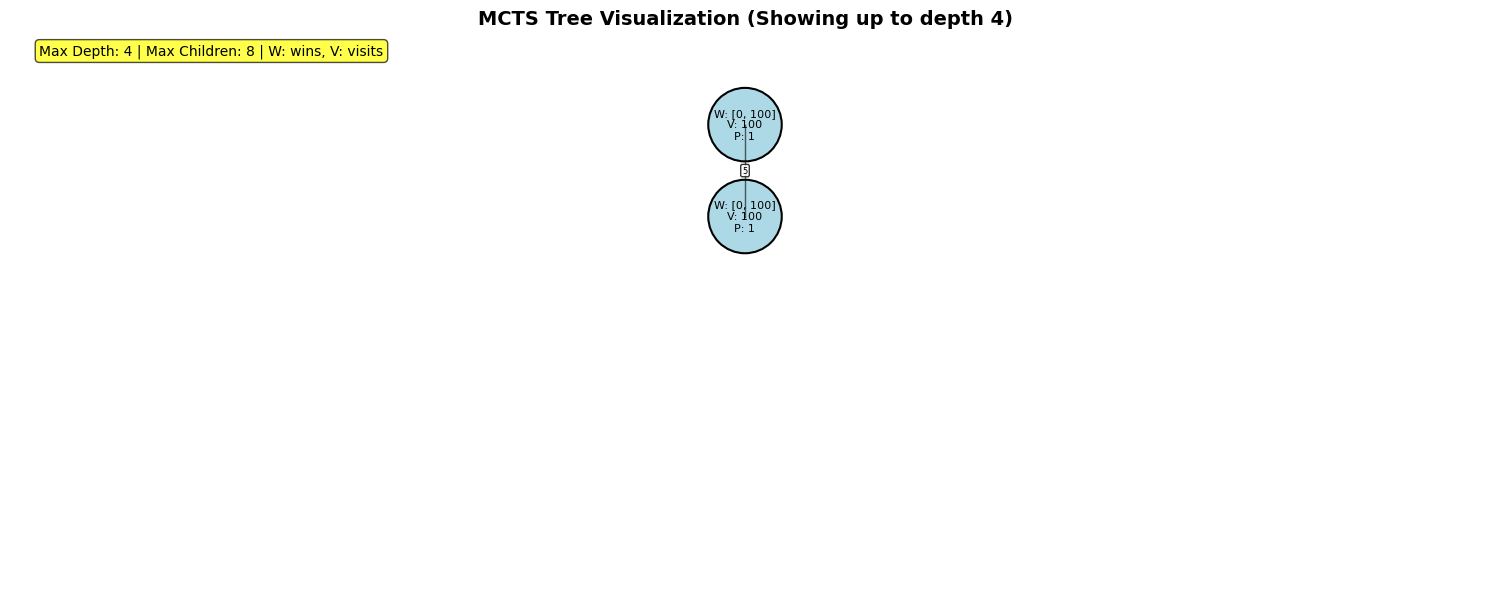

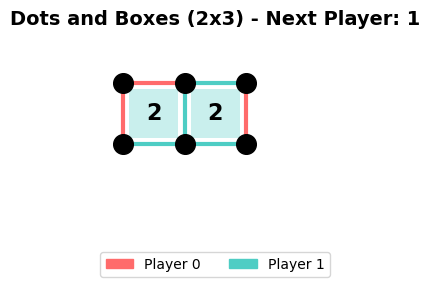

Game over!
Winner:  1


In [ ]:
mcts_player = MCTSPlayer(
    policy_fn=random_policy,
    max_simulations=500,
    debug=True,
    wait_for_input=True,
)

player_fns_human_mcts = [
    mcts_player,
    mcts_player,
    # human_player,
]

game = gametypes.DotsAndBoxesGame(rows=2, cols=3)
updated_game = play_interactive(game=game, player_fns=player_fns_human_mcts)